## `SentinelHubStore` zarr store implementation

This Notebook opens and inspects the data cubes generated by `cube = xarray.open_zarr(SentinelHubStore(...))`.

In [2]:
import xarray as xr

In [3]:
from xcube_sh.sentinelhub import SentinelHub
from xcube_sh.store import SentinelHubStore
from xcube_sh.config import CubeConfig

In [4]:
sentinel_hub = SentinelHub()

In [5]:
chunk_size = 512
spatial_coverage = 0.034 # degrees
spatial_res = spatial_coverage / chunk_size
x1 = 10.237174
y1 = 53.506205
x2 = x1 + 2 * spatial_coverage
y2 = y1 + 2 * spatial_coverage
geometry = [x1, y1, x2, y2]

In [6]:
cube_config = CubeConfig(dataset_name='S2L1C',
                         band_names=['B01', 'B08', 'B11'],
                         chunk_size=[chunk_size, chunk_size],
                         geometry=geometry,
                         spatial_res=spatial_res,
                         time_range=['2017-08-01', '2017-10-31'])

cube_store = SentinelHubStore(sentinel_hub, cube_config)

In [7]:
cube = xr.open_zarr(cube_store)
cube

<xarray.Dataset>
Dimensions:    (bnds: 2, lat: 1024, lon: 1024, time: 15)
Coordinates:
  * lat        (lat) float64 53.57 53.57 53.57 53.57 ... 53.51 53.51 53.51 53.51
  * lon        (lon) float64 10.24 10.24 10.24 10.24 ... 10.3 10.31 10.31 10.31
  * time       (time) datetime64[ns] 2017-08-03T10:30:21 ... 2017-10-27T10:31:28
    time_bnds  (time, bnds) datetime64[ns] dask.array<chunksize=(15, 2), meta=np.ndarray>
Dimensions without coordinates: bnds
Data variables:
    B01        (time, lat, lon) float32 dask.array<chunksize=(1, 512, 512), meta=np.ndarray>
    B08        (time, lat, lon) float32 dask.array<chunksize=(1, 512, 512), meta=np.ndarray>
    B11        (time, lat, lon) float32 dask.array<chunksize=(1, 512, 512), meta=np.ndarray>
Attributes:
    Conventions:             CF-1.7
    title:                   S2L1C Data Cube Subset
    history:                 [{'program': 'xcube_sh.store.SentinelHubStore', ...
    date_created:            2019-10-30T15:03:44.063305
    processi

In [8]:
# import timeit
# timeit.timeit("cube.to_zarr('cube-sh.zarr')", number=1, globals=dict(cube=cube))

In [9]:
cube.B08

<xarray.DataArray 'B08' (time: 15, lat: 1024, lon: 1024)>
dask.array<zarr, shape=(15, 1024, 1024), dtype=float32, chunksize=(1, 512, 512), chunktype=numpy.ndarray>
Coordinates:
  * lat      (lat) float64 53.57 53.57 53.57 53.57 ... 53.51 53.51 53.51 53.51
  * lon      (lon) float64 10.24 10.24 10.24 10.24 ... 10.3 10.31 10.31 10.31
  * time     (time) datetime64[ns] 2017-08-03T10:30:21 ... 2017-10-27T10:31:28
Attributes:
    sample_type:  FLOAT32
    units:        reflectance
    wavelength:   832.8
    bandwith:     106
    resolution:   10

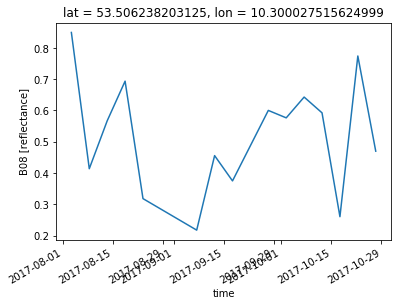

In [11]:
ts = cube.B08.sel(lat=53.5, lon=10.3, method='nearest')
ts.plot()

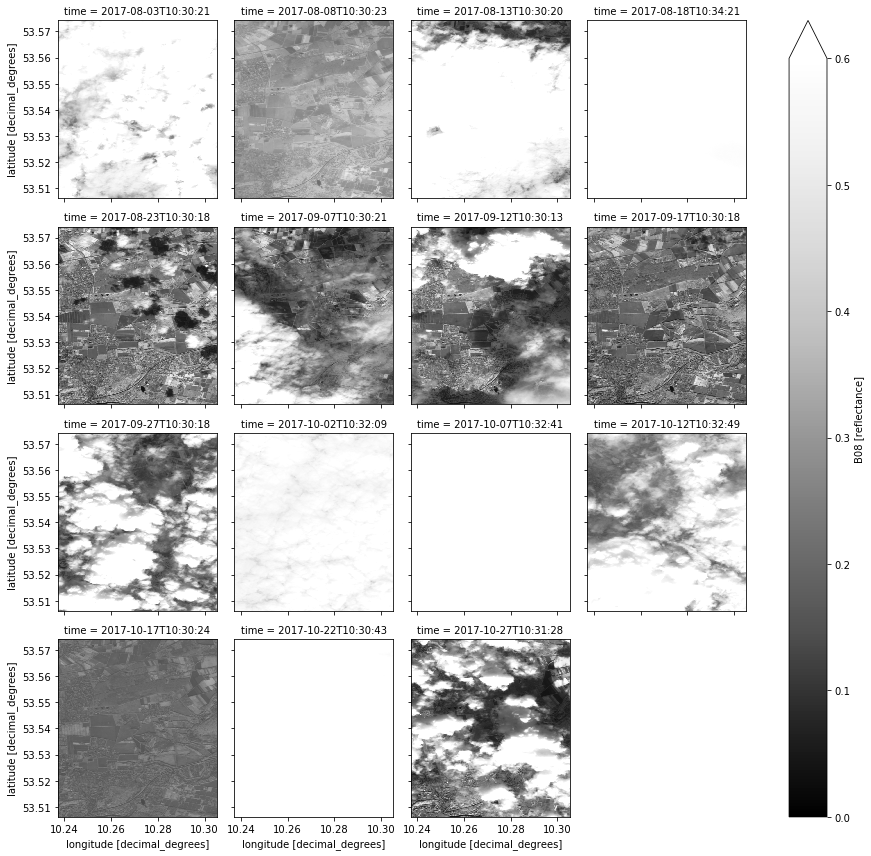

In [12]:
cube.B08.plot.imshow(x='lon', y='lat', col='time', col_wrap=4, vmin=0, vmax=0.6, cmap='Greys_r')

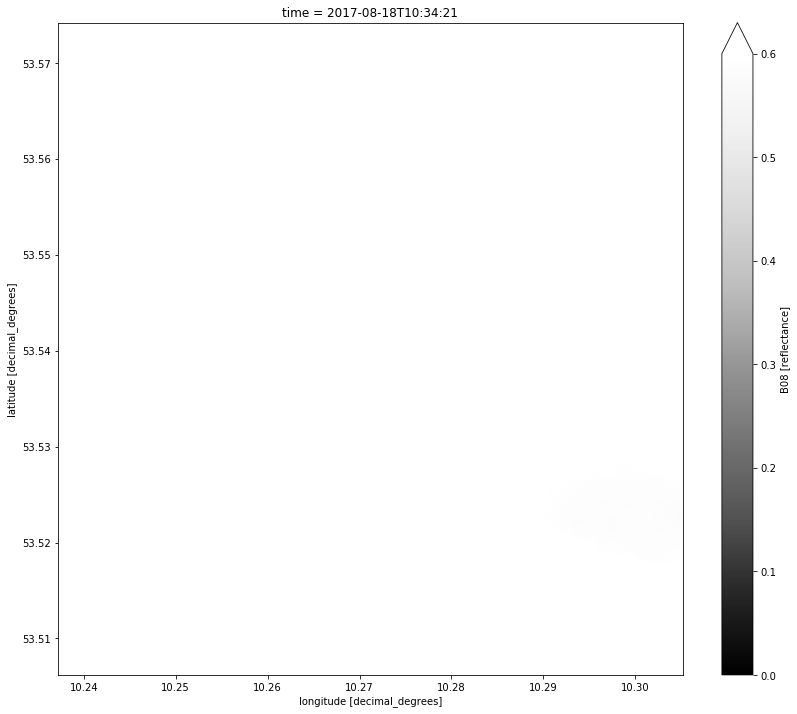

In [13]:
cube.B08.isel(time=3).plot.imshow(vmin=0, vmax=0.6, cmap='Greys_r', figsize=(14, 12))

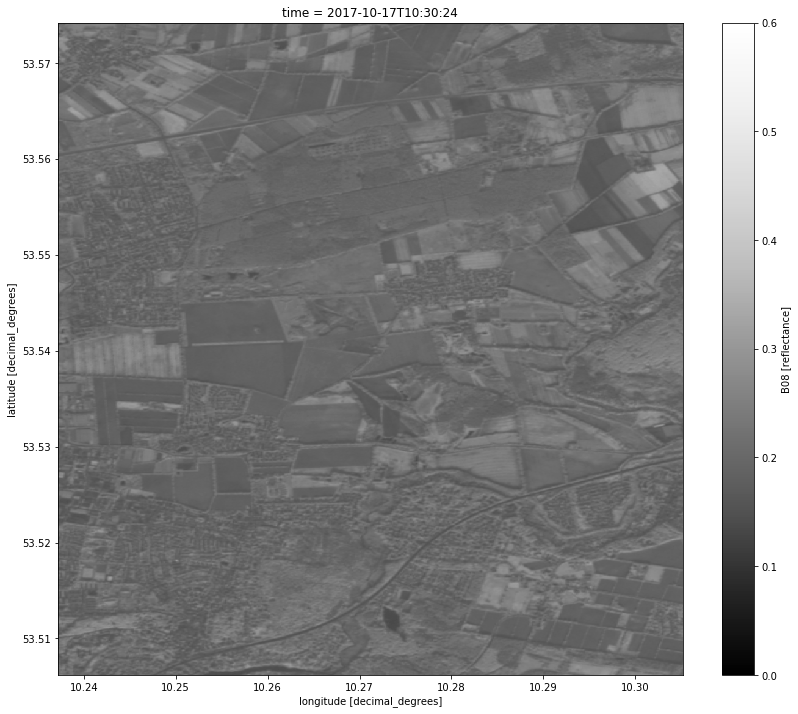

In [14]:
cube.B08.isel(time=12).plot.imshow(vmin=0, vmax=0.6, cmap='Greys_r', figsize=(14, 12))

In [15]:
cube.time

<xarray.DataArray 'time' (time: 15)>
array(['2017-08-03T10:30:21.000000000', '2017-08-08T10:30:23.000000000',
       '2017-08-13T10:30:20.000000000', '2017-08-18T10:34:21.000000000',
       '2017-08-23T10:30:18.000000000', '2017-09-07T10:30:21.000000000',
       '2017-09-12T10:30:13.000000000', '2017-09-17T10:30:18.000000000',
       '2017-09-27T10:30:18.000000000', '2017-10-02T10:32:09.000000000',
       '2017-10-07T10:32:41.000000000', '2017-10-12T10:32:49.000000000',
       '2017-10-17T10:30:24.000000000', '2017-10-22T10:30:43.000000000',
       '2017-10-27T10:31:28.000000000'], dtype='datetime64[ns]')
Coordinates:
  * time     (time) datetime64[ns] 2017-08-03T10:30:21 ... 2017-10-27T10:31:28
Attributes:
    standard_name:  time
    bounds:         time_bnds

In [16]:
cube.time.encoding

{'chunks': (15,),
 'compressor': None,
 'filters': None,
 'units': 'seconds since 1970-01-01T00:00:00Z',
 'calendar': 'proleptic_gregorian',
 'dtype': dtype('int64')}

In [17]:
cube.time_bnds.values

array([['2017-08-03T10:30:21.000000000', '2017-08-03T10:30:21.000000000'],
       ['2017-08-08T10:30:23.000000000', '2017-08-08T10:30:23.000000000'],
       ['2017-08-13T10:30:20.000000000', '2017-08-13T10:30:20.000000000'],
       ['2017-08-18T10:34:21.000000000', '2017-08-18T10:34:21.000000000'],
       ['2017-08-23T10:30:18.000000000', '2017-08-23T10:30:18.000000000'],
       ['2017-09-07T10:30:21.000000000', '2017-09-07T10:30:21.000000000'],
       ['2017-09-12T10:30:13.000000000', '2017-09-12T10:30:13.000000000'],
       ['2017-09-17T10:30:18.000000000', '2017-09-17T10:30:18.000000000'],
       ['2017-09-27T10:30:18.000000000', '2017-09-27T10:30:18.000000000'],
       ['2017-10-02T10:32:09.000000000', '2017-10-02T10:32:09.000000000'],
       ['2017-10-07T10:32:41.000000000', '2017-10-07T10:32:41.000000000'],
       ['2017-10-12T10:32:49.000000000', '2017-10-12T10:32:49.000000000'],
       ['2017-10-17T10:30:24.000000000', '2017-10-17T10:30:24.000000000'],
       ['2017-10-22T10:30

---

Generate a 4D cube from 1-week aggregations:


In [19]:
cube_config = CubeConfig(dataset_name='S2L1C',
                         band_names=['B01', 'B08', 'B11'],
                         chunk_size=[chunk_size, chunk_size],
                         geometry=geometry,
                         spatial_res=spatial_res,
                         time_range=['2017-08-01', '2017-10-31'],
                         time_period='1W',
                         four_d=True)

cube_store = SentinelHubStore(sentinel_hub, cube_config)

In [20]:
cube_4d = xr.open_zarr(cube_store)
cube_4d

<xarray.Dataset>
Dimensions:    (band: 3, bnds: 2, lat: 1024, lon: 1024, time: 14)
Coordinates:
  * band       (band) <U3 'B01' 'B08' 'B11'
  * lat        (lat) float64 53.57 53.57 53.57 53.57 ... 53.51 53.51 53.51 53.51
  * lon        (lon) float64 10.24 10.24 10.24 10.24 ... 10.3 10.31 10.31 10.31
  * time       (time) datetime64[ns] 2017-08-04T12:00:00 ... 2017-11-03T12:00:00
    time_bnds  (time, bnds) datetime64[ns] dask.array<chunksize=(14, 2), meta=np.ndarray>
Dimensions without coordinates: bnds
Data variables:
    band_data  (time, lat, lon, band) float32 dask.array<chunksize=(1, 512, 512, 3), meta=np.ndarray>
Attributes:
    Conventions:               CF-1.7
    title:                     S2L1C Data Cube Subset
    history:                   [{'program': 'xcube_sh.store.SentinelHubStore'...
    date_created:              2019-10-30T15:05:35.996308
    processing_level:          L1C
    time_coverage_start:       2017-08-01T00:00:00+00:00
    time_coverage_end:         2017-11

In [21]:
cube_4d.band_data

<xarray.DataArray 'band_data' (time: 14, lat: 1024, lon: 1024, band: 3)>
dask.array<zarr, shape=(14, 1024, 1024, 3), dtype=float32, chunksize=(1, 512, 512, 3), chunktype=numpy.ndarray>
Coordinates:
  * band     (band) <U3 'B01' 'B08' 'B11'
  * lat      (lat) float64 53.57 53.57 53.57 53.57 ... 53.51 53.51 53.51 53.51
  * lon      (lon) float64 10.24 10.24 10.24 10.24 ... 10.3 10.31 10.31 10.31
  * time     (time) datetime64[ns] 2017-08-04T12:00:00 ... 2017-11-03T12:00:00
Attributes:
    band_names:  ['B01', 'B08', 'B11']

In [22]:
cube_4d.band_data.isel(time=3, band=1).plot.imshow(vmin=0, vmax=0.6, cmap='Greys_r', figsize=(14, 12))

SentinelHubError: Internal Server Error, status code 500:
b'{"error":{"status":500,"reason":"Internal Server Error","message":"Something went wrong!","code":"RENDERER_EXCEPTION"}}'


In [ ]:
sentinel_hub.close()